In [1]:
import os
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_json(os.path.join("data", "filmy.json"))

In [2]:
df = df.explode("Lokace")

## Explorace

<AxesSubplot:xlabel='Copyright'>

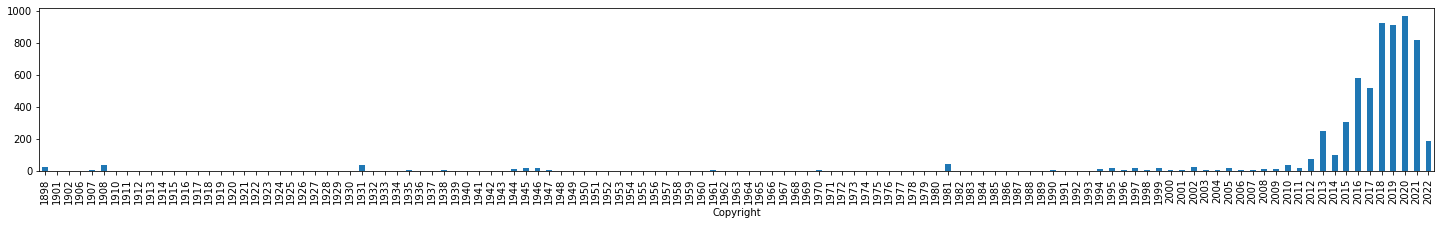

In [3]:
df.groupby("Copyright")["Lokace"].nunique().plot.bar(figsize=(25,3))

<AxesSubplot:xlabel='Copyright'>

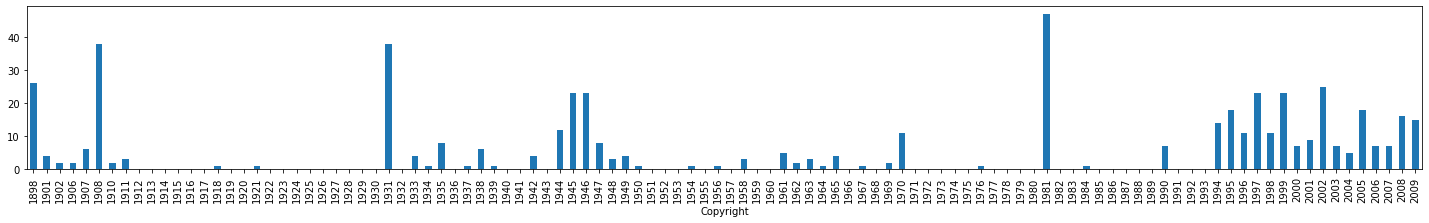

In [4]:
df[df["Copyright"] < 2010].groupby("Copyright")["Lokace"].nunique().plot.bar(figsize=(25,3))

## Čištění

In [5]:
df.groupby("Lokace")["Film"].nunique().nlargest(300).index.to_list()

['Česká republika, Praha (Česká republika)',
 'Nové Město (Praha)',
 'Staré Město (Praha)',
 'Malá Strana (Praha)',
 'Vltava (Praha)',
 'Hradčany (Praha)',
 'Vinohrady (Praha)',
 'Praha (Česká republika)',
 'Holešovice (Praha)',
 'Žižkov (Praha)',
 'Dejvice (Praha)',
 'Smíchov (Praha)',
 'Staroměstské náměstí (Staré Město)',
 'Slovensko, Bratislava (Slovensko)',
 'Bubeneč (Praha)',
 'Václavské náměstí (Nové Město)',
 'Karlín (Praha)',
 'Nusle (Praha)',
 'Národní třída (Nové Město)',
 'Josefov (Praha)',
 'Praha',
 'Pražský hrad (Hradčany)',
 'Ruzyně (Praha)',
 'Výstaviště (Bubeneč)',
 'Praha, Nové Město (Praha)',
 'Karlův most (Vltava)',
 'Letná (Praha)',
 'Podolí (Praha)',
 'Praha, Vltava (Praha)',
 'Brno (Česká republika)',
 'Libeň (Praha)',
 'Praha, Bubeneč (Praha)',
 'bez exteriérů',
 'Francie, Paříž (Francie)',
 'Vršovice (Praha)',
 'Vodičkova ulice (Nové Město)',
 'most Legií (Vltava)',
 'náměstí Jana Palacha (Josefov)',
 'Malostranské náměstí (Malá Strana)',
 'Praha, Hradčany (Pr

In [6]:
prazske_ctvrti = ["Staré Město","Nové Město","Hradčany","Bubeneč","Vltava","Josefov","Malá Strana","Ruzyně","Karlín","Václavské náměstí","Břevnov","Vinohrady","Holešovice","Dejvice","Podolí","Letná","Žižkov","Staroměstské náměstí","Nusle","Řeporyje","Strahov","Krč","Vinohradská ulice","Libeň","ulice Politických vězňů","Smíchov","Vršovice","Národní třída","Bohnice","náměstí Jana Palacha","náměstí Jana Palacha","Hlubočepy","náměstí Republiky","Malostranské náměstí","Vodičkova ulice","Pražský hrad","náměstí Republiky","Hradčanské náměstí","Strašnice","Barrandov","Kavčí hory","Kbely","Smetanovo nábřeží","náměstí Míru","ulice Komunardů","Chodov","Kampa"]

In [7]:
def mesto(lokace):
    
    if isinstance(lokace, str):
    
        if "(" in lokace:

            zavorka = lokace.split("(")[1].replace(")","").strip()

            if zavorka in prazske_ctvrti:

                mesto = "Praha"

            elif zavorka == "Česká republika":
                
                mesto = lokace.split("(")[0].strip()
            
            else:

                mesto = zavorka

        else:
            
            mesto = lokace
            
        if "Česká republika, " in mesto:
                
            mesto = mesto.split(",")[1].strip()
            
    else:

        mesto = lokace         
        
    return(mesto)

In [8]:
mesto("Celetná ulice (Staré Město)")

'Praha'

In [9]:
df["Město"] = df["Lokace"].apply(lambda x: mesto(x))

In [10]:
df["Město"]

0             Praha
0             Praha
1             Praha
1             Praha
1       ulice Újezd
           ...     
4505          Úštěk
4505         Kanada
4505       Montreal
4505       Montreal
4505       Montreal
Name: Město, Length: 11000, dtype: object

In [11]:
df[df["Lokace"].str.contains("Česká republika, ",na=True)]["Lokace"]

41                                             NaN
42                                             NaN
43                                             NaN
45                                             NaN
46                                             NaN
                           ...                    
4495      Česká republika, Praha (Česká republika)
4497      Česká republika, Praha (Česká republika)
4498    Česká republika, Příbram (Česká republika)
4503      Česká republika, Praha (Česká republika)
4505      Česká republika, Praha (Česká republika)
Name: Lokace, Length: 4019, dtype: object

In [12]:
", ".join(df.groupby("Město")["Film"].nunique().nlargest(1000).index.to_list())

'Praha, Slovensko, Brno, Francie, Německo, Polsko, Itálie, Rakousko, Bratislava, Spojené státy americké, bez exteriérů, USA, Velká Británie, Ostrava, Ústí nad Labem, Liberec, Rusko, Plzeň, Zlín, Jaroměř, Hradec Králové, Maďarsko, New York, Olomouc, Paříž, Ukrajina, Doksy, Jizerské hory, Kladno, Nizozemsko, Rumunsko, Slapy, Výstaviště, Španělsko, Beroun, Brdy, Chorvatsko, Kalifornie, Karlovy Vary, Krkonoše, Lucerna, Mikulov, Mladá Boleslav, Praha a okolí, Veltrusy, České Budějovice, Šumava, Broumov, Bělohorská ulice, Jihlava, Kolín, Michle, Mělník, New York City, Norsko, Náchod, Nádražní ulice, Pankrác, Pardubice, Pernerova ulice, Poděbrady, Příbram, Slovinsko, Sněmovní ulice, Stodůlky, Viničná ulice, Vysočany, náměstí Svobody, Švýcarsko, Izrael, Japonsko, Kobylisy, Kouřim, Králův Dvůr, Letňany, Loretánské náměstí, Lysá nad Labem, Masarykovo náměstí, Moskva, Motol, Palackého náměstí, Palackého ulice, Petřín, Prostějov, Přerov nad Labem, Radotín, Spálená ulice, Staroměstská radnice, Suši

## Tak co teď?

In [13]:
hcf = df[df["Délka"] == "dlouhometrážní"].explode("Typologie")
hcf = hcf[hcf["Typologie"] == "hraný"]

In [14]:
hcf.groupby("Město")["Film"].nunique().nlargest(50)

Město
Praha               177
Slovensko            56
bez exteriérů        13
Brno                 11
Německo              10
Jaroměř               9
Polsko                9
Francie               8
Rakousko              8
Bratislava            7
Itálie                7
Zlín                  7
Beroun                6
Hradec Králové        6
Kladno                6
Liberec               6
Mladá Boleslav        6
Olomouc               6
Ostrava               6
Praha a okolí         6
Brdy                  5
Jizerské hory         5
Plzeň                 5
Slapy                 5
Veltrusy              5
Viničná ulice         5
náměstí Svobody       5
Ústí nad Labem        5
Doksy                 4
Karlovy Vary          4
Kouřim                4
Mikulov               4
Mělník                4
Nádražní ulice        4
Pankrác               4
Pernerova ulice       4
Poděbrady             4
Přerov nad Labem      4
Příbram               4
Rumunsko              4
Slovinsko             4
Terezín   

In [15]:
df[df["Lokace"].str.lower().str.contains("(česká republika)", na=False)].groupby("Lokace")["Film"].nunique().nlargest(50)

C:\Users\micha\AppData\Local\Temp\ipykernel_25008\3879034159.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df["Lokace"].str.lower().str.contains("(česká republika)", na=False)].groupby("Lokace")["Film"].nunique().nlargest(50)


Lokace
Česká republika, Praha (Česká republika)        99
Praha (Česká republika)                         36
Brno (Česká republika)                          14
Česká republika, Brno (Česká republika)          9
Ostrava (Česká republika)                        7
Plzeň (Česká republika)                          6
Jaroměř (Česká republika)                        5
Kolín (Česká republika)                          5
Veltrusy (Česká republika)                       5
Doksy (Česká republika)                          4
Hradec Králové (Česká republika)                 4
Jihlava (Česká republika)                        4
Olomouc (Česká republika)                        4
Slapy (Česká republika)                          4
Zlín (Česká republika)                           4
Ústí nad Labem (Česká republika)                 4
Beroun (Česká republika)                         3
Brdy (Česká republika)                           3
Broumov (Česká republika)                        3
Jizerské hory (Česká rep

In [16]:
df[df["Lokace"].str.lower().str.contains("ulice", na=False)].groupby("Lokace")["Film"].nunique().nlargest(50)

Lokace
Vodičkova ulice (Nové Město)                         12
Pernerova ulice (Karlín)                              9
Praha, ulice (Praha)                                  7
Vinohradská ulice (Vinohrady)                         7
Bělohorská ulice (Břevnov)                            6
Lucerna (Vodičkova ulice)                             6
Pařížská ulice (Staré Město)                          6
ulice Komunardů (Holešovice)                          6
Dejvická ulice (Dejvice)                              5
Koulova ulice (Dejvice)                               5
Nádražní ulice (Smíchov)                              5
Sněmovní ulice (Malá Strana)                          5
Spálená ulice (Nové Město)                            5
ulice Na Pankráci (Nusle)                             5
ulice Politických vězňů (Nové Město)                  5
Bartolomějská ulice (Staré Město)                     4
Hellichova ulice (Malá Strana)                        4
Jankovcova ulice (Holešovice)            

In [17]:
df[df["Lokace"].str.lower().str.contains("zámek", na=False)].groupby("Lokace")["Film"].nunique().nlargest(50)

Lokace
Mostecko, zámek Jezeří                                                                                                                                                       2
zámek /skleníky/ (Veltrusy)                                                                                                                                                  2
Benešovsko, Martinice u Dolních Kralovic, zámek Martinice (Martinice u Dolních Kralovic)                                                                                     1
Bobnice, Poděbrady, zámek (Poděbrady)                                                                                                                                        1
Egyptský pavilon (zámek Veltrusy)                                                                                                                                            1
Hostýnské vrchy, Panská skála (Varahany) u Kamenického Šenova, Zlatý vrch u České Kamenice, tvrz Cuknštejn, Roudnice n

In [18]:
df[df["Lokace"].str.lower().str.contains("náměstí", na=False)].groupby("Lokace")["Film"].nunique().nlargest(50)

Lokace
Staroměstské náměstí (Staré Město)                                            25
Václavské náměstí (Nové Město)                                                23
náměstí Jana Palacha (Josefov)                                                12
Malostranské náměstí (Malá Strana)                                            11
Hradčanské náměstí (Hradčany)                                                 10
Národní muzeum (Václavské náměstí)                                             7
náměstí Republiky (Staré Město)                                                7
Václavské náměstí (Praha)                                                      6
náměstí Curieových (Staré Město)                                               6
Pražský hrad (Hradčanské náměstí)                                              5
Rudolfinum (náměstí Jana Palacha)                                              5
Staroměstská radnice (Staroměstské náměstí)                                    5
náměstí Svobody (Bube

In [19]:
df[df["Lokace"].str.lower().str.contains("(kostel|katedrála)", na=False)].groupby("Lokace")["Film"].nunique().nlargest(50)

C:\Users\micha\AppData\Local\Temp\ipykernel_25008\356451550.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df["Lokace"].str.lower().str.contains("(kostel|katedrála)", na=False)].groupby("Lokace")["Film"].nunique().nlargest(50)


Lokace
Katedrála sv. Víta (Pražský hrad)                                                                                                                                                                        3
kostel sv. Mikuláše (Malostranské náměstí)                                                                                                                                                               3
Katedrála sv. Víta (Praha)                                                                                                                                                                               2
kostel sv. Cyrila a Metoděje (Karlínské náměstí)                                                                                                                                                         2
kostel sv. Ludmily (náměstí Míru)                                                                                                                                                    

In [20]:
df[df["Lokace"].str.lower().str.contains("brno", na=False)].groupby("Lokace")["Film"].nunique().nlargest(50)

Lokace
Brno (Česká republika)                                                                                                                                                                                   14
Česká republika, Brno (Česká republika)                                                                                                                                                                   9
Výstaviště (Brno)                                                                                                                                                                                         3
Kounicova ulice (Brno)                                                                                                                                                                                    2
Kraví hora (Brno)                                                                                                                                                                